https://www.kaggle.com/competitions/GiveMeSomeCredit

In [29]:
import pandas as pd
import numpy as np

In [30]:
sampleEntry = pd.read_csv('sampleEntry.csv')
test = pd.read_csv('cs-test.csv')
train = pd.read_csv('cs-training.csv')

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [32]:
train.dtypes.value_counts()

int64      8
float64    4
Name: count, dtype: int64

In [5]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [33]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [34]:
train = train.dropna()
train = train.drop(columns=['Unnamed: 0'])

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 10  NumberOfDependents                    120269 non-null  float64
dtypes: fl

In [36]:
X_train = train.drop(columns=['SeriousDlqin2yrs'])
y_train = train['SeriousDlqin2yrs']
corr_matrix = train.corr()
corr_matrix['SeriousDlqin2yrs'].sort_values()

age                                    -0.102685
NumberOfOpenCreditLinesAndLoans        -0.027445
MonthlyIncome                          -0.019746
DebtRatio                              -0.003291
NumberRealEstateLoansOrLines           -0.003005
RevolvingUtilizationOfUnsecuredLines   -0.002386
NumberOfDependents                      0.046704
NumberOfTime60-89DaysPastDueNotWorse    0.093836
NumberOfTimes90DaysLate                 0.111149
NumberOfTime30-59DaysPastDueNotWorse    0.123159
SeriousDlqin2yrs                        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [42]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[0 1] [22399  1654]


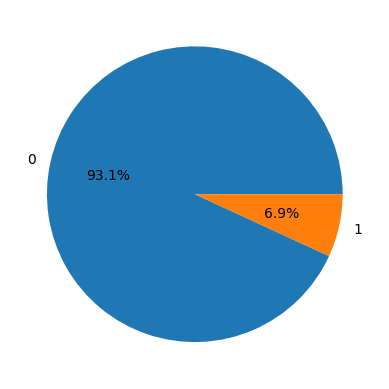

In [49]:
import matplotlib.pyplot as plt
plt.pie([counts[0], counts[1]], labels=["0", "1"], autopct='%1.1f%%')
plt.show()

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [55]:
pipeline_Log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced'))
])
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.2, random_state=42)
pipeline_Log_reg.fit(X_train, y_train)

y_pred = pipeline_Log_reg.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(precision)
print(recall)
print(f1)

0.11284046692607004
0.5686274509803921
0.18831168831168832


In [56]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RFC = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])
pipeline_RFC.fit(X_train, y_train)

y_pred = pipeline_RFC.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(precision)
print(recall)
print(f1)

0.625
0.09803921568627451
0.1694915254237288


In [61]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

pipeline_сatboost = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        eval_metric='F1',
        random_seed=42,
        auto_class_weights='Balanced'
    ))
])

pipeline_сatboost.fit(X_train, y_train)

y_pred = pipeline_сatboost.predict(X_test)
print(classification_report(y_test, y_pred))

0:	learn: 0.7471926	total: 57.6ms	remaining: 17.2s
1:	learn: 0.8261453	total: 58.2ms	remaining: 8.67s
2:	learn: 0.9007810	total: 58.6ms	remaining: 5.8s
3:	learn: 0.8800120	total: 59.1ms	remaining: 4.37s
4:	learn: 0.9110905	total: 59.5ms	remaining: 3.51s
5:	learn: 0.9395082	total: 60ms	remaining: 2.94s
6:	learn: 0.9368231	total: 61.2ms	remaining: 2.56s
7:	learn: 0.9395082	total: 61.9ms	remaining: 2.26s
8:	learn: 0.9476567	total: 62.3ms	remaining: 2.01s
9:	learn: 0.9476567	total: 62.7ms	remaining: 1.82s
10:	learn: 0.9422088	total: 63.1ms	remaining: 1.66s
11:	learn: 0.9476567	total: 63.6ms	remaining: 1.52s
12:	learn: 0.9504044	total: 64ms	remaining: 1.41s
13:	learn: 0.9531680	total: 64.6ms	remaining: 1.32s
14:	learn: 0.9531680	total: 65ms	remaining: 1.24s
15:	learn: 0.9531680	total: 65.5ms	remaining: 1.16s
16:	learn: 0.9449249	total: 66ms	remaining: 1.1s
17:	learn: 0.9587438	total: 66.4ms	remaining: 1.04s
18:	learn: 0.9801700	total: 66.8ms	remaining: 988ms
19:	learn: 0.9504044	total: 67.2

In [ ]:
test=test.drop(columns=["SeriousDlqin2yrs","Unnamed: 0"])
res = pipeline_сatboost.predict_proba(test)
sampleEntry["Probability"]=res
sampleEntry.head()

,Id,Probability
0,1,0.990909
1,2,0.984225
2,3,0.997121
3,4,0.989787
4,5,0.131730


In [64]:
sampleEntry.to_csv("submission.csv",index=False)